## Data Loading

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from processing_utils.feature_data_from_mat import load_subject_high_gamma

In [3]:
sig = True
zscore = False

Load in S14 Data

In [4]:
phon_labels = ['a', 'ae', 'i', 'u', 'b', 'p', 'v', 'g', 'k']

In [5]:
S14_hg_trace, S14_hg_map, S14_phon_labels = load_subject_high_gamma('S14', sig_channel=sig, zscore=zscore)

(144, 200, 111)
(144, 8, 16, 200)
(144, 3)


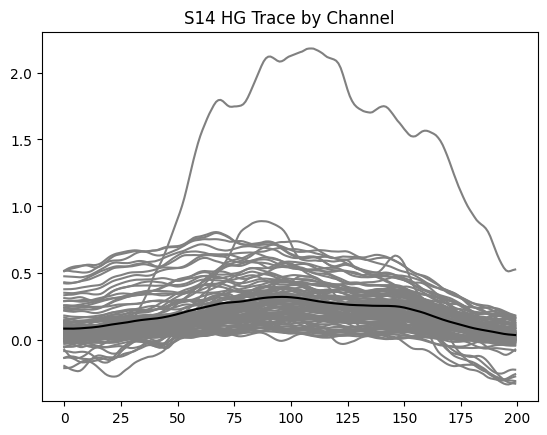

In [6]:
print(S14_hg_trace.shape)
print(S14_hg_map.shape)
print(S14_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S14_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S14_hg_trace, axis=0), axis=1), 'black')
plt.title('S14 HG Trace by Channel')
plt.show()

Load in S26 Data

In [7]:
S26_hg_trace, S26_hg_map, S26_phon_labels = load_subject_high_gamma('S26', sig_channel=sig, zscore=zscore)

(148, 200, 111)
(148, 8, 16, 200)
(148, 3)


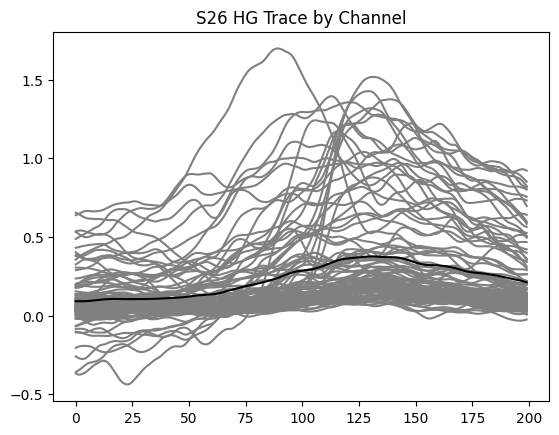

In [8]:
print(S26_hg_trace.shape)
print(S26_hg_map.shape)
print(S26_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S26_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S26_hg_trace, axis=0), axis=1), 'black')
plt.title('S26 HG Trace by Channel')
plt.show()

Load in S23 Data

In [9]:
S23_hg_trace, S23_hg_map, S23_phon_labels = load_subject_high_gamma('S23', sig_channel=sig, zscore=zscore)

(151, 200, 63)
(151, 8, 16, 200)
(151, 3)


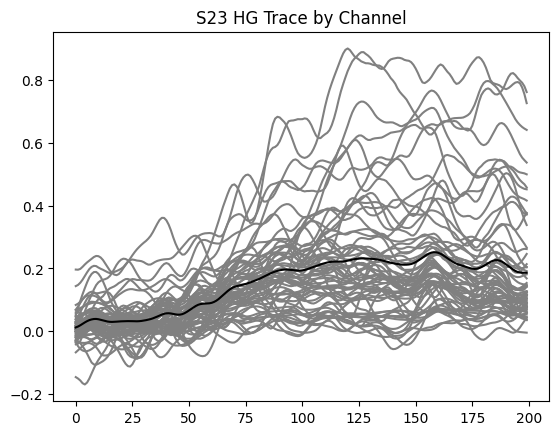

In [10]:
print(S23_hg_trace.shape)
print(S23_hg_map.shape)
print(S23_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S23_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S23_hg_trace, axis=0), axis=1), 'black')
plt.title('S23 HG Trace by Channel')
plt.show()

Load in S33 Data

In [11]:
S33_hg_trace, S33_hg_map, S33_phon_labels = load_subject_high_gamma('S33', sig_channel=sig, zscore=zscore)

(46, 200, 149)
(46, 12, 24, 200)
(46, 3)


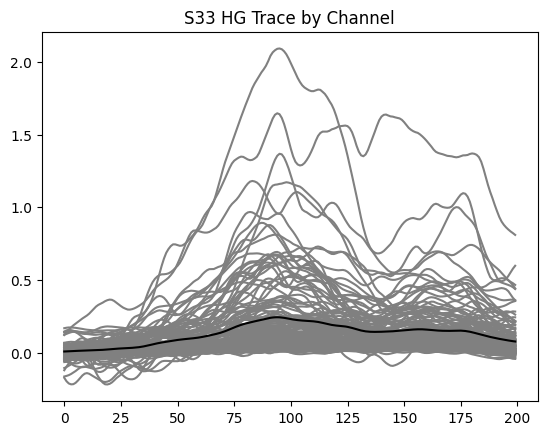

In [12]:
print(S33_hg_trace.shape)
print(S33_hg_map.shape)
print(S33_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S33_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S33_hg_trace, axis=0), axis=1), 'black')
plt.title('S33 HG Trace by Channel')
plt.show()

## PCA Visualization

In [13]:
from sklearn.decomposition import PCA

### Time-Averaged Across Single Window

In [14]:
t = np.linspace(-0.5, 0.5, S14_hg_trace.shape[1])
t_avg_win = [0, 0.25]
t_avg_win_idx = np.where((t >= t_avg_win[0]) & (t <= t_avg_win[1]))[0]

In [15]:
# X_S14 = np.reshape(S14_hg_trace, (S14_hg_trace.shape[0], S14_hg_trace.shape[1] * S14_hg_trace.shape[2]))
# X_S26 = np.reshape(S26_hg_trace, (S26_hg_trace.shape[0], S26_hg_trace.shape[1] * S26_hg_trace.shape[2]))
# X_S23 = np.reshape(S23_hg_trace, (S23_hg_trace.shape[0], S23_hg_trace.shape[1] * S23_hg_trace.shape[2]))
# X_S33 = np.reshape(S33_hg_trace, (S33_hg_trace.shape[0], S33_hg_trace.shape[1] * S33_hg_trace.shape[2]))
X_S14 = np.mean(S14_hg_trace[:, t_avg_win_idx], axis=1)  # average across time
X_S26 = np.mean(S26_hg_trace[:, t_avg_win_idx], axis=1)
X_S23 = np.mean(S23_hg_trace[:, t_avg_win_idx], axis=1)
X_S33 = np.mean(S33_hg_trace[:, t_avg_win_idx], axis=1)

In [16]:
n_features = 10
pca = PCA(n_components=n_features)
Xt_S14 = pca.fit_transform(X_S14)
Xt_S26 = pca.fit_transform(X_S26)
Xt_S23 = pca.fit_transform(X_S23)
Xt_S33 = pca.fit_transform(X_S33)

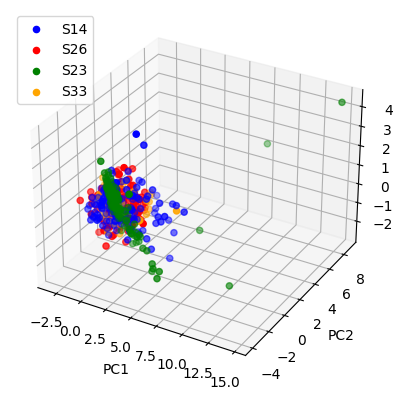

In [17]:
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(Xt_S14[:, 0], Xt_S14[:, 1], Xt_S14[:, 2], color='blue', label='S14')
ax.scatter(Xt_S26[:, 0], Xt_S26[:, 1], Xt_S26[:, 2], color='red', label='S26')
ax.scatter(Xt_S23[:, 0], Xt_S23[:, 1], Xt_S23[:, 2], color='green', label='S23')
ax.scatter(Xt_S33[:, 0], Xt_S33[:, 1], Xt_S33[:, 2], color='orange', label='S33')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

In [18]:
pca_S14 = PCA(n_components=n_features)
pca_S26 = PCA(n_components=n_features)
pca_S23 = PCA(n_components=n_features)
pca_S33 = PCA(n_components=n_features)

pca_S14.fit(X_S14)
pca_S26.fit(X_S26)
pca_S23.fit(X_S23)
pca_S33.fit(X_S33)

PCA(n_components=10)

In [19]:
lat_dyn_S14 = np.vectorize(pca_S14.transform, signature='(n,m)->(n,k)')(S14_hg_trace)
lat_dyn_S26 = np.vectorize(pca_S26.transform, signature='(n,m)->(n,k)')(S26_hg_trace)
lat_dyn_S23 = np.vectorize(pca_S23.transform, signature='(n,m)->(n,k)')(S23_hg_trace)
lat_dyn_S33 = np.vectorize(pca_S33.transform, signature='(n,m)->(n,k)')(S33_hg_trace)

In [20]:
tr_avg_lat_dyn_S14 = np.mean(lat_dyn_S14, axis=0)
tr_avg_lat_dyn_S26 = np.mean(lat_dyn_S26, axis=0)
tr_avg_lat_dyn_S23 = np.mean(lat_dyn_S23, axis=0)
tr_avg_lat_dyn_S33 = np.mean(lat_dyn_S33, axis=0)

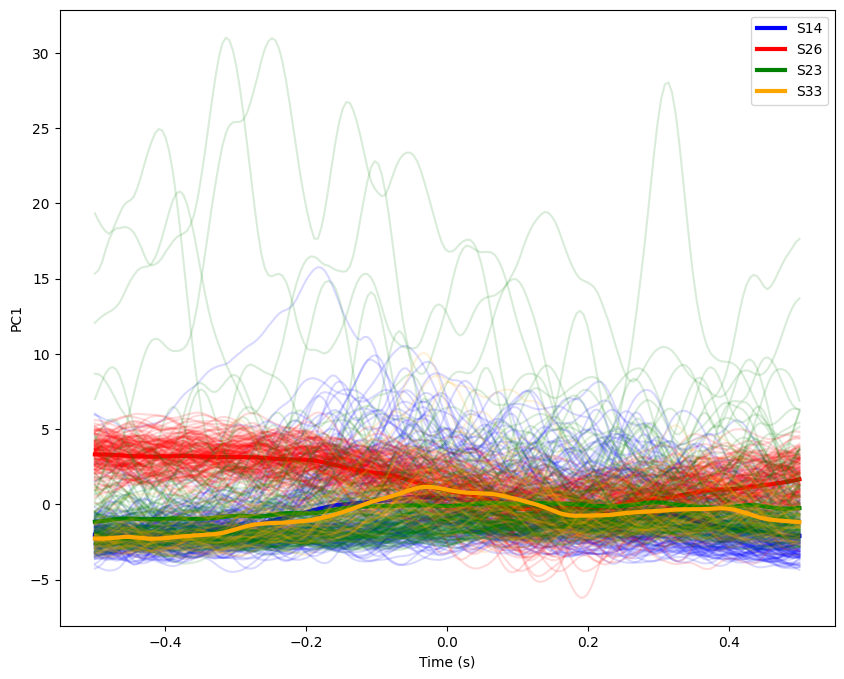

In [21]:
tr_alpha = 0.15

plt.figure(figsize=(10,8))
plt.plot(t, lat_dyn_S14[:,:,0].T, color='blue', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S14[:,0], color='blue', label='S14', linewidth=3)
plt.plot(t, lat_dyn_S26[:,:,0].T, color='red', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S26[:,0], color='red', label='S26', linewidth=3)
plt.plot(t, lat_dyn_S23[:,:,0].T, color='green', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S23[:,0], color='green', label='S23', linewidth=3)
plt.plot(t, lat_dyn_S33[:,:,0].T, color='orange', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S33[:,0], color='orange', label='S33', linewidth=3)
plt.xlabel('Time (s)')
plt.ylabel('PC1')
plt.legend()
plt.show()


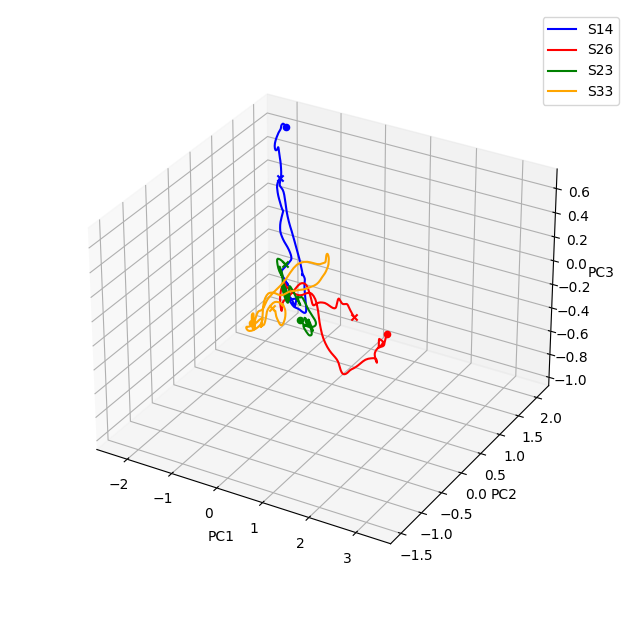

In [22]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.85)
ax.plot(tr_avg_lat_dyn_S14[:, 0], tr_avg_lat_dyn_S14[:, 1], tr_avg_lat_dyn_S14[:, 2], color='blue', label='S14')
ax.scatter(tr_avg_lat_dyn_S14[0, 0], tr_avg_lat_dyn_S14[0, 1], tr_avg_lat_dyn_S14[0, 2], color='blue')
ax.scatter(tr_avg_lat_dyn_S14[-1, 0], tr_avg_lat_dyn_S14[-1, 1], tr_avg_lat_dyn_S14[-1, 2], marker='x', color='blue')
ax.plot(tr_avg_lat_dyn_S26[:, 0], tr_avg_lat_dyn_S26[:, 1], tr_avg_lat_dyn_S26[:, 2], color='red', label='S26')
ax.scatter(tr_avg_lat_dyn_S26[0, 0], tr_avg_lat_dyn_S26[0, 1], tr_avg_lat_dyn_S26[0, 2], color='red')
ax.scatter(tr_avg_lat_dyn_S26[-1, 0], tr_avg_lat_dyn_S26[-1, 1], tr_avg_lat_dyn_S26[-1, 2], marker='x', color='red')
ax.plot(tr_avg_lat_dyn_S23[:, 0], tr_avg_lat_dyn_S23[:, 1], tr_avg_lat_dyn_S23[:, 2], color='green', label='S23')
ax.scatter(tr_avg_lat_dyn_S23[0, 0], tr_avg_lat_dyn_S23[0, 1], tr_avg_lat_dyn_S23[0, 2], color='green')
ax.scatter(tr_avg_lat_dyn_S23[-1, 0], tr_avg_lat_dyn_S23[-1, 1], tr_avg_lat_dyn_S23[-1, 2], marker='x', color='green')
ax.plot(tr_avg_lat_dyn_S33[:, 0], tr_avg_lat_dyn_S33[:, 1], tr_avg_lat_dyn_S33[:, 2], color='orange', label='S33')
ax.scatter(tr_avg_lat_dyn_S33[0, 0], tr_avg_lat_dyn_S33[0, 1], tr_avg_lat_dyn_S33[0, 2], color='orange')
ax.scatter(tr_avg_lat_dyn_S33[-1, 0], tr_avg_lat_dyn_S33[-1, 1], tr_avg_lat_dyn_S33[-1, 2], marker='x', color='orange')
# ax.scatter(Xt_S14[:, 0], Xt_S14[:, 1], Xt_S14[:, 2], color='blue', label='S14')
# ax.scatter(Xt_S26[:, 0], Xt_S26[:, 1], Xt_S26[:, 2], color='red', label='S26')
# ax.scatter(Xt_S23[:, 0], Xt_S23[:, 1], Xt_S23[:, 2], color='green', label='S23')
# ax.scatter(Xt_S33[:, 0], Xt_S33[:, 1], Xt_S33[:, 2], color='orange', label='S33')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

### Time-Averaged in Smaller Windows

In [23]:

def get_sub_windows(arr, win_size):
    n_time = arr.shape[1]
    n_win = int(n_time / win_size)
    for i in range(n_win):
        yield arr[:, i * win_size:(i + 1) * win_size]

In [24]:
win_size = 10

In [25]:
lat_dyn_win_S14 = np.zeros((S14_hg_trace.shape[0], S14_hg_trace.shape[1], n_features))
offset = np.zeros((n_features,))
for i, S14_win in enumerate(get_sub_windows(S14_hg_trace, win_size)):
    curr_avg = np.mean(S14_win, axis=1)
    curr_pca = pca_S14.fit(curr_avg)
    curr_lat_dyn = np.vectorize(curr_pca.transform, signature='(n,m)->(n,k)')(S14_win)
    lat_dyn_win_S14[:, i * win_size:(i + 1) * win_size, :] = curr_lat_dyn + offset
    offset = curr_lat_dyn[-1, :] 

tr_avg_lat_dyn_win_S14 = np.mean(lat_dyn_win_S14, axis=0)

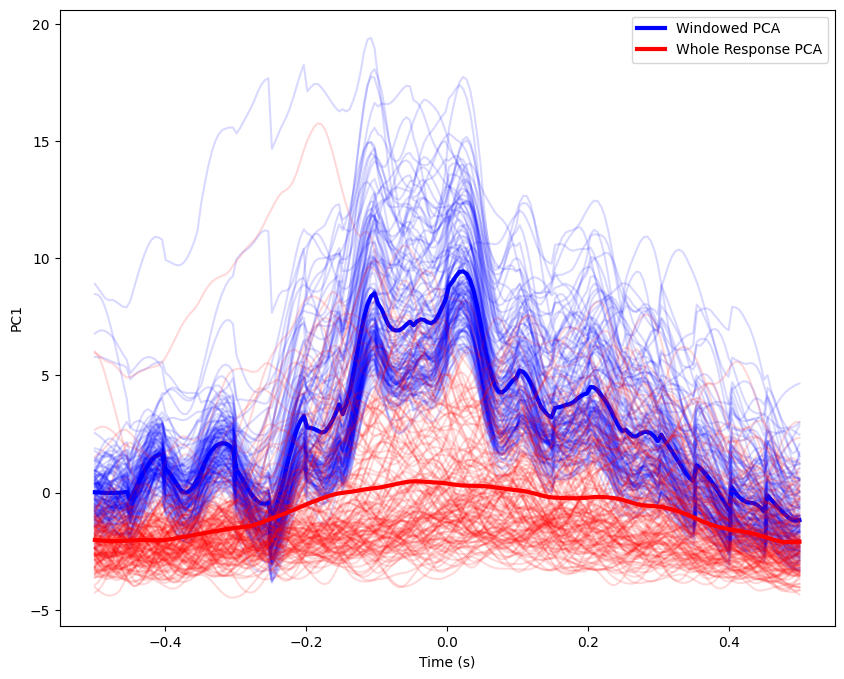

In [26]:
plt.figure(figsize=(10,8))
plt.plot(t, lat_dyn_win_S14[:,:,0].T, color='blue', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_win_S14[:,0], color='blue', label='Windowed PCA', linewidth=3)
plt.plot(t, lat_dyn_S14[:,:,0].T, color='red', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S14[:,0], color='red', label='Whole Response PCA', linewidth=3)
plt.xlabel('Time (s)')
plt.ylabel('PC1')
plt.legend()
plt.show()

### Time-Dimension Concatenated w/ Trials

#### PCA on Trial-Time Dim

In [27]:
X_S14_T_ext = np.reshape(S14_hg_trace, (S14_hg_trace.shape[0]*S14_hg_trace.shape[1], S14_hg_trace.shape[2]))
X_S26_T_ext = np.reshape(S26_hg_trace, (S26_hg_trace.shape[0]*S26_hg_trace.shape[1], S26_hg_trace.shape[2]))
X_S23_T_ext = np.reshape(S23_hg_trace, (S23_hg_trace.shape[0]*S23_hg_trace.shape[1], S23_hg_trace.shape[2]))
X_S33_T_ext = np.reshape(S33_hg_trace, (S33_hg_trace.shape[0]*S33_hg_trace.shape[1], S33_hg_trace.shape[2]))

In [28]:
n_features = 10
pca = PCA(n_components=n_features)
Xt_ext_S14 = pca.fit_transform(X_S14_T_ext)
Xt_ext_S26 = pca.fit_transform(X_S26_T_ext)
Xt_ext_S23 = pca.fit_transform(X_S23_T_ext)
Xt_ext_S33 = pca.fit_transform(X_S33_T_ext)

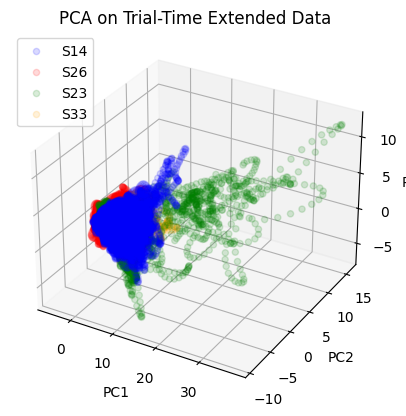

In [29]:
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(Xt_ext_S14[:, 0], Xt_ext_S14[:, 1], Xt_ext_S14[:, 2], color='blue', label='S14', alpha=tr_alpha)
ax.scatter(Xt_ext_S26[:, 0], Xt_ext_S26[:, 1], Xt_ext_S26[:, 2], color='red', label='S26', alpha=tr_alpha)
ax.scatter(Xt_ext_S23[:, 0], Xt_ext_S23[:, 1], Xt_ext_S23[:, 2], color='green', label='S23', alpha=tr_alpha)
ax.scatter(Xt_ext_S33[:, 0], Xt_ext_S33[:, 1], Xt_ext_S33[:, 2], color='orange', label='S33', alpha=tr_alpha)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.title('PCA on Trial-Time Extended Data')
plt.show()

In [30]:
pca_S14_ext = PCA(n_components=n_features)
pca_S26_ext = PCA(n_components=n_features)
pca_S23_ext = PCA(n_components=n_features)
pca_S33_ext = PCA(n_components=n_features)

pca_S14_ext.fit(X_S14_T_ext)
pca_S26_ext.fit(X_S26_T_ext)
pca_S23_ext.fit(X_S23_T_ext)
pca_S33_ext.fit(X_S33_T_ext)

PCA(n_components=10)

In [31]:
lat_dyn_S14_ext = np.reshape(Xt_ext_S14, (S14_hg_trace.shape[0], S14_hg_trace.shape[1], n_features))
lat_dyn_S26_ext = np.reshape(Xt_ext_S26, (S26_hg_trace.shape[0], S26_hg_trace.shape[1], n_features))
lat_dyn_S23_ext = np.reshape(Xt_ext_S23, (S23_hg_trace.shape[0], S23_hg_trace.shape[1], n_features))
lat_dyn_S33_ext = np.reshape(Xt_ext_S33, (S33_hg_trace.shape[0], S33_hg_trace.shape[1], n_features))

#### Trial-Averaged (Likely Not Super Useful)

In [32]:
tr_avg_lat_dyn_S14_ext = np.mean(lat_dyn_S14_ext, axis=0)
tr_avg_lat_dyn_S26_ext = np.mean(lat_dyn_S26_ext, axis=0)
tr_avg_lat_dyn_S23_ext = np.mean(lat_dyn_S23_ext, axis=0)
tr_avg_lat_dyn_S33_ext = np.mean(lat_dyn_S33_ext, axis=0)

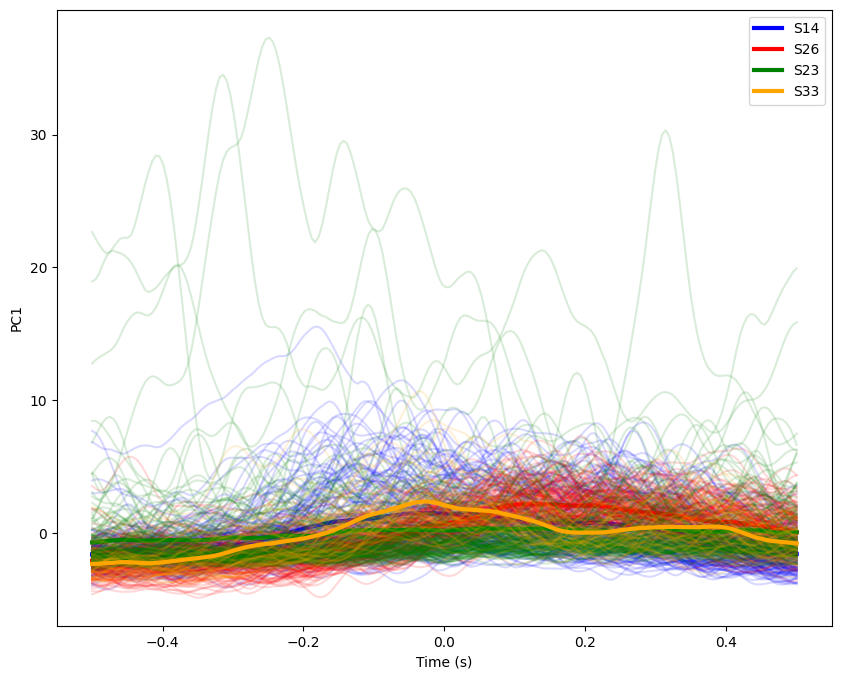

In [33]:
plt.figure(figsize=(10,8))
plt.plot(t, lat_dyn_S14_ext[:,:,0].T, color='blue', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S14_ext[:,0], color='blue', label='S14', linewidth=3)
plt.plot(t, lat_dyn_S26_ext[:,:,0].T, color='red', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S26_ext[:,0], color='red', label='S26', linewidth=3)
plt.plot(t, lat_dyn_S23_ext[:,:,0].T, color='green', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S23_ext[:,0], color='green', label='S23', linewidth=3)
plt.plot(t, lat_dyn_S33_ext[:,:,0].T, color='orange', alpha=tr_alpha)
plt.plot(t, tr_avg_lat_dyn_S33_ext[:,0], color='orange', label='S33', linewidth=3)
plt.xlabel('Time (s)')
plt.ylabel('PC1')
plt.legend()
plt.show()

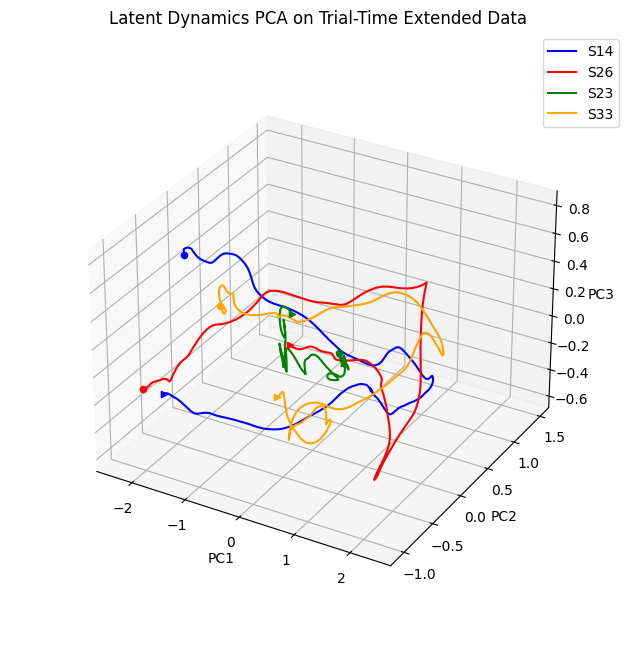

In [34]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.85)
ax.plot(tr_avg_lat_dyn_S14_ext[:, 0], tr_avg_lat_dyn_S14_ext[:, 1], tr_avg_lat_dyn_S14_ext[:, 2], color='blue', label='S14')
ax.scatter(tr_avg_lat_dyn_S14_ext[0, 0], tr_avg_lat_dyn_S14_ext[0, 1], tr_avg_lat_dyn_S14_ext[0, 2], color='blue')
ax.scatter(tr_avg_lat_dyn_S14_ext[-1, 0], tr_avg_lat_dyn_S14_ext[-1, 1], tr_avg_lat_dyn_S14_ext[-1, 2], marker='>', color='blue')
ax.plot(tr_avg_lat_dyn_S26_ext[:, 0], tr_avg_lat_dyn_S26_ext[:, 1], tr_avg_lat_dyn_S26_ext[:, 2], color='red', label='S26')
ax.scatter(tr_avg_lat_dyn_S26_ext[0, 0], tr_avg_lat_dyn_S26_ext[0, 1], tr_avg_lat_dyn_S26_ext[0, 2], color='red')
ax.scatter(tr_avg_lat_dyn_S26_ext[-1, 0], tr_avg_lat_dyn_S26_ext[-1, 1], tr_avg_lat_dyn_S26_ext[-1, 2], marker='>', color='red')
ax.plot(tr_avg_lat_dyn_S23_ext[:, 0], tr_avg_lat_dyn_S23_ext[:, 1], tr_avg_lat_dyn_S23_ext[:, 2], color='green', label='S23')
ax.scatter(tr_avg_lat_dyn_S23_ext[0, 0], tr_avg_lat_dyn_S23_ext[0, 1], tr_avg_lat_dyn_S23_ext[0, 2], color='green')
ax.scatter(tr_avg_lat_dyn_S23_ext[-1, 0], tr_avg_lat_dyn_S23_ext[-1, 1], tr_avg_lat_dyn_S23_ext[-1, 2], marker='>', color='green')
ax.plot(tr_avg_lat_dyn_S33_ext[:, 0], tr_avg_lat_dyn_S33_ext[:, 1], tr_avg_lat_dyn_S33_ext[:, 2], color='orange', label='S33')
ax.scatter(tr_avg_lat_dyn_S33_ext[0, 0], tr_avg_lat_dyn_S33_ext[0, 1], tr_avg_lat_dyn_S33_ext[0, 2], color='orange')
ax.scatter(tr_avg_lat_dyn_S33_ext[-1, 0], tr_avg_lat_dyn_S33_ext[-1, 1], tr_avg_lat_dyn_S33_ext[-1, 2], marker='>', color='orange')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.title('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

#### Class-Averaged

In [35]:
def labels2str(labels, seq_ind=None):
    labels_str = []
    for i in range(labels.shape[0]):
        if seq_ind is None:
            labels_str.append(''.join(str(x) for x in labels[i, :]))
        else:
            labels_str.append(str(labels[i, seq_ind]))
    return np.array(labels_str)

S14_str_labels_p1 = labels2str(S14_phon_labels, seq_ind=0)
S26_str_labels_p1 = labels2str(S26_phon_labels, seq_ind=0)
S23_str_labels_p1 = labels2str(S23_phon_labels, seq_ind=0)
S33_str_labels_p1 = labels2str(S33_phon_labels, seq_ind=0)

In [36]:
def group_by_class(data, labels):
    data_by_class = np.zeros((len(np.unique(labels)), data.shape[1],
                              data.shape[2]))
    for i, seq in enumerate(np.unique(labels)):
        data_by_class[i,:,:] = np.mean(data[labels == seq, :, :], axis=0)
    return data_by_class

lat_dyn_S14_p1_sep = group_by_class(lat_dyn_S14_ext, S14_str_labels_p1)
lat_dyn_S26_p1_sep = group_by_class(lat_dyn_S26_ext, S26_str_labels_p1)
lat_dyn_S23_p1_sep = group_by_class(lat_dyn_S23_ext, S23_str_labels_p1)
lat_dyn_S33_p1_sep = group_by_class(lat_dyn_S33_ext, S33_str_labels_p1)


In [37]:
L_p1_S14 = np.reshape(lat_dyn_S14_p1_sep, (lat_dyn_S14_p1_sep.shape[0]*lat_dyn_S14_p1_sep.shape[1], lat_dyn_S14_p1_sep.shape[2]))
L_p1_S26 = np.reshape(lat_dyn_S26_p1_sep, (lat_dyn_S26_p1_sep.shape[0]*lat_dyn_S26_p1_sep.shape[1], lat_dyn_S26_p1_sep.shape[2]))
L_p1_S23 = np.reshape(lat_dyn_S23_p1_sep, (lat_dyn_S23_p1_sep.shape[0]*lat_dyn_S23_p1_sep.shape[1], lat_dyn_S23_p1_sep.shape[2]))
L_p1_S33 = np.reshape(lat_dyn_S33_p1_sep, (lat_dyn_S33_p1_sep.shape[0]*lat_dyn_S33_p1_sep.shape[1], lat_dyn_S33_p1_sep.shape[2]))

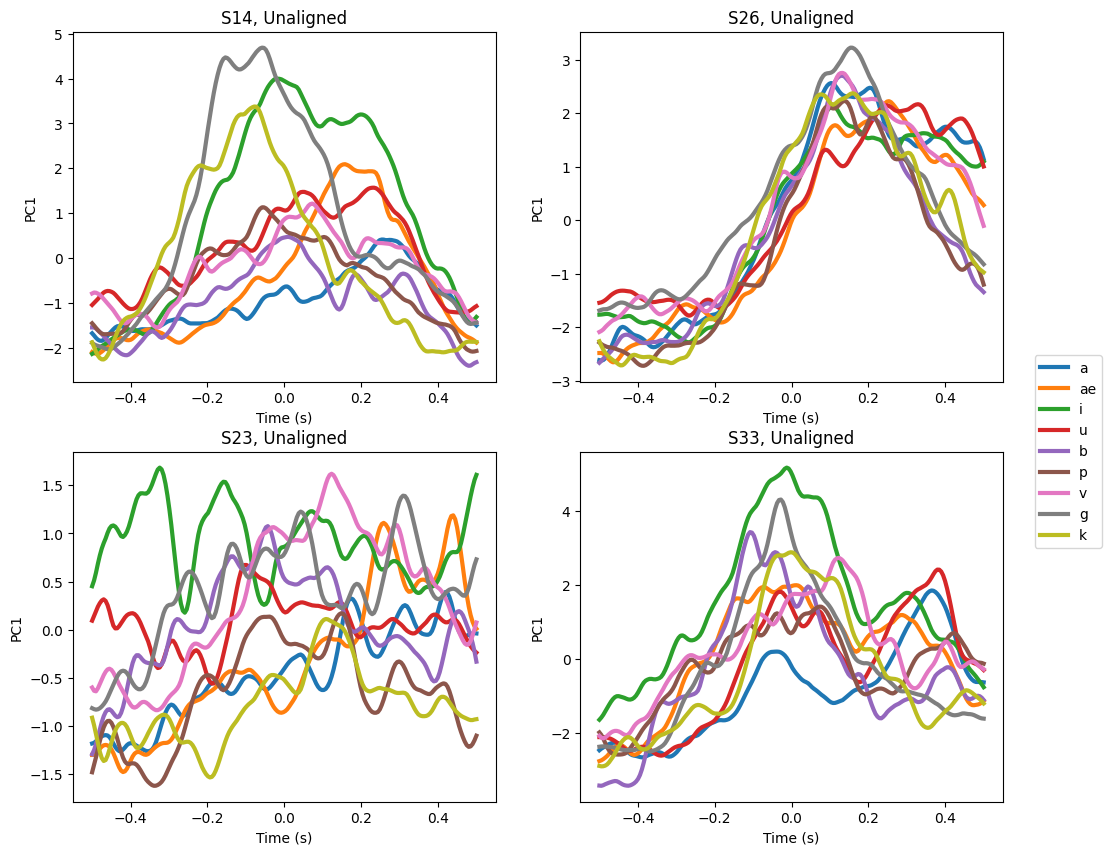

In [38]:
pt_list = ['S14', 'S26', 'S23', 'S33']
pt_p1_labels = [S14_str_labels_p1, S26_str_labels_p1, S23_str_labels_p1, S33_str_labels_p1]
pt_lat_dyn = [lat_dyn_S14_p1_sep, lat_dyn_S26_p1_sep, lat_dyn_S23_p1_sep, lat_dyn_S33_p1_sep]
pc_ind = 0

f, axs = plt.subplots(2, 2, figsize=(12,10))
for i, ax in enumerate(axs.flat):
    curr_lat_dyn = pt_lat_dyn[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, curr_lat_dyn[j,:,pc_ind], label=phon_labels[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, Unaligned')
plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.show()

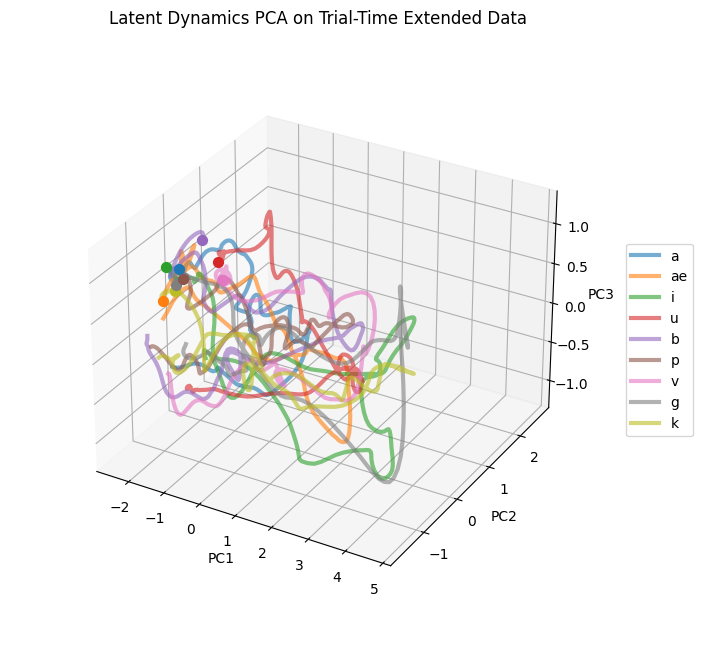

In [39]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.85)
for i, seq in enumerate(np.unique(S14_str_labels_p1)):
    ax.plot(lat_dyn_S14_p1_sep[i, :, 0], lat_dyn_S14_p1_sep[i, :, 1], lat_dyn_S14_p1_sep[i, :, 2], label=phon_labels[i], linewidth=3, alpha=0.6)
    ax.scatter(lat_dyn_S14_p1_sep[i, 0, 0], lat_dyn_S14_p1_sep[i, 0, 1], lat_dyn_S14_p1_sep[i, 0, 2], s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(bbox_to_anchor=(1.12, 0.5), loc="center right")
plt.title('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

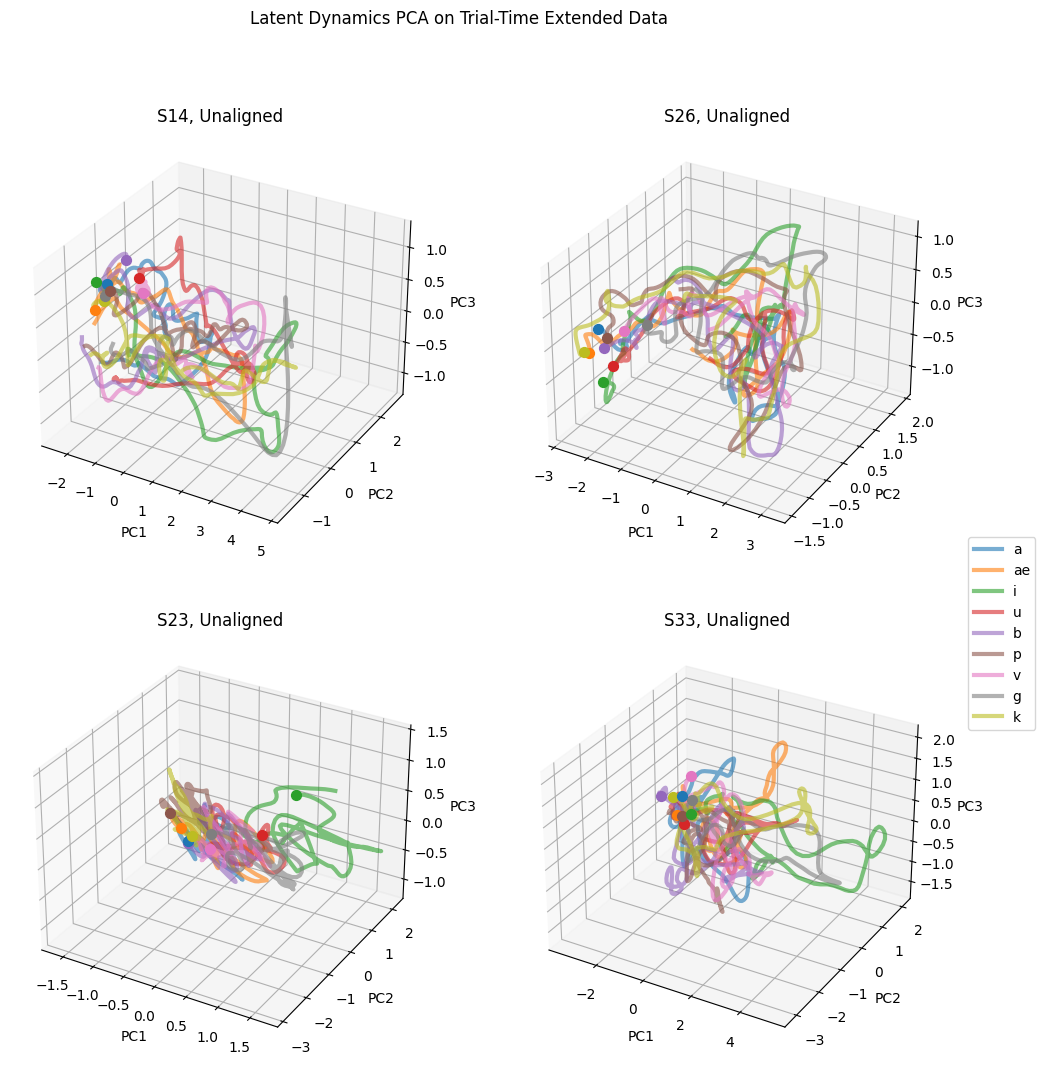

In [40]:
f = plt.figure(figsize=(12,12))
sp = [221, 222, 223, 224]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    curr_lat_dyn = pt_lat_dyn[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(curr_lat_dyn[j, :,0], curr_lat_dyn[j, :,1], curr_lat_dyn[j, :,2], label=phon_labels[j], linewidth=3, alpha=0.6)
        ax.scatter(curr_lat_dyn[j, 0,0], curr_lat_dyn[j, 0,1], curr_lat_dyn[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    # ax.set_xlim([-11.5, 15])
    # ax.set_ylim([-6.5, 6.2])
    # ax.set_zlim([-2.5, 3])
    ax.set_title(f'{pt_list[i]}, Unaligned')

plt.legend(bbox_to_anchor=(1.25, 1), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

#### CCA Alignment

In [41]:
def CCA_align(L_a, L_b):
    """ Alignment method from https://www.nature.com/articles/s41593-019-0555-4#Sec11
    L_x has shape (m, T), where m is number of PCs and T is n_trials * n_timepoints
    m, T must be same for both L_a and L_b
    """
    # QR decomposition
    Q_a, R_a = np.linalg.qr(L_a.T)
    Q_b, R_b = np.linalg.qr(L_b.T)

    # SVD on q inner product
    U, S, Vt = np.linalg.svd(Q_a.T @ Q_b)

    # calculate manifold directions
    M_a = np.linalg.pinv(R_a) @ U
    M_b = np.linalg.pinv(R_b) @ Vt.T

    return M_a, M_b

##### Sequence Instances

In [42]:
S14_str_labels_all = labels2str(S14_phon_labels, seq_ind=None)
S26_str_labels_all = labels2str(S26_phon_labels, seq_ind=None)
S23_str_labels_all = labels2str(S23_phon_labels, seq_ind=None)
S33_str_labels_all = labels2str(S33_phon_labels, seq_ind=None)

lat_dyn_S14_seq_sep = group_by_class(lat_dyn_S14_ext, S14_str_labels_all)
lat_dyn_S26_seq_sep = group_by_class(lat_dyn_S26_ext, S26_str_labels_all)
lat_dyn_S23_seq_sep = group_by_class(lat_dyn_S23_ext, S23_str_labels_all)
lat_dyn_S33_seq_sep = group_by_class(lat_dyn_S33_ext, S33_str_labels_all)

In [43]:
L_seq_S14 = np.reshape(lat_dyn_S14_seq_sep, (lat_dyn_S14_seq_sep.shape[0]*lat_dyn_S14_seq_sep.shape[1], lat_dyn_S14_seq_sep.shape[2]))
L_seq_S26 = np.reshape(lat_dyn_S26_seq_sep, (lat_dyn_S26_seq_sep.shape[0]*lat_dyn_S26_seq_sep.shape[1], lat_dyn_S26_seq_sep.shape[2]))
L_seq_S23 = np.reshape(lat_dyn_S23_seq_sep, (lat_dyn_S23_seq_sep.shape[0]*lat_dyn_S23_seq_sep.shape[1], lat_dyn_S23_seq_sep.shape[2]))
L_seq_S33 = np.reshape(lat_dyn_S33_seq_sep, (lat_dyn_S33_seq_sep.shape[0]*lat_dyn_S33_seq_sep.shape[1], lat_dyn_S33_seq_sep.shape[2]))

In [44]:
M_seq_S14, M_seq_S26 = CCA_align(L_seq_S14.T, L_seq_S26.T)
L_new_seq_S14 = L_seq_S14 @ M_seq_S14
L_new_seq_S26 = L_seq_S26 @ M_seq_S26

In [45]:
L_new_seq_S14 = np.reshape(L_new_seq_S14, (lat_dyn_S14_seq_sep.shape[0], lat_dyn_S14_seq_sep.shape[1], lat_dyn_S14_seq_sep.shape[2]))
L_new_seq_S26 = np.reshape(L_new_seq_S26, (lat_dyn_S26_seq_sep.shape[0], lat_dyn_S26_seq_sep.shape[1], lat_dyn_S26_seq_sep.shape[2]))

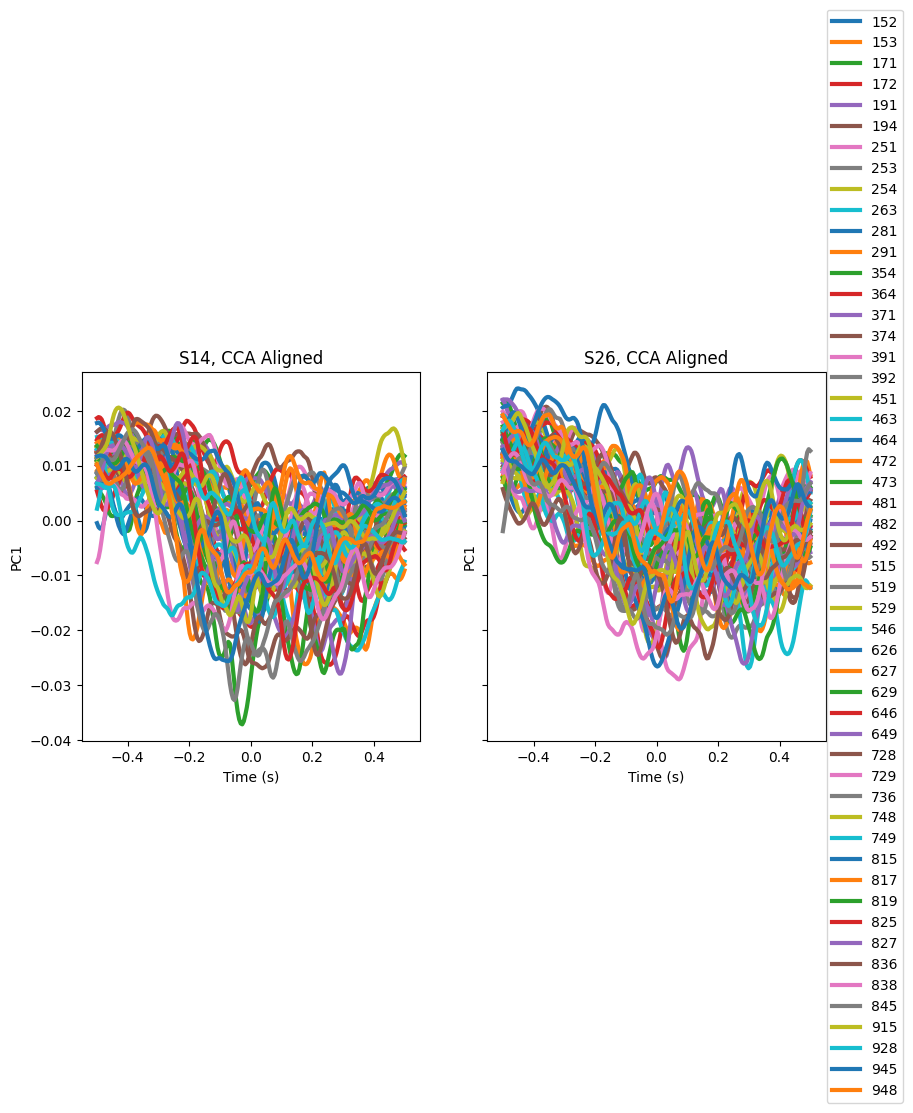

In [46]:
pt_L_new_seq = [L_new_seq_S14, L_new_seq_S26]
pt_seq_labels = [S14_str_labels_all, S26_str_labels_all]
pc_ind = 0

f, axs = plt.subplots(1, 2, figsize=plt.figaspect(0.5), sharey=True)
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_seq[i]
    curr_lab = pt_seq_labels[i]
    for j, seq in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=seq, linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, CCA Aligned')
plt.legend(bbox_to_anchor=(1.25, 0.5), loc="center right")
plt.show()

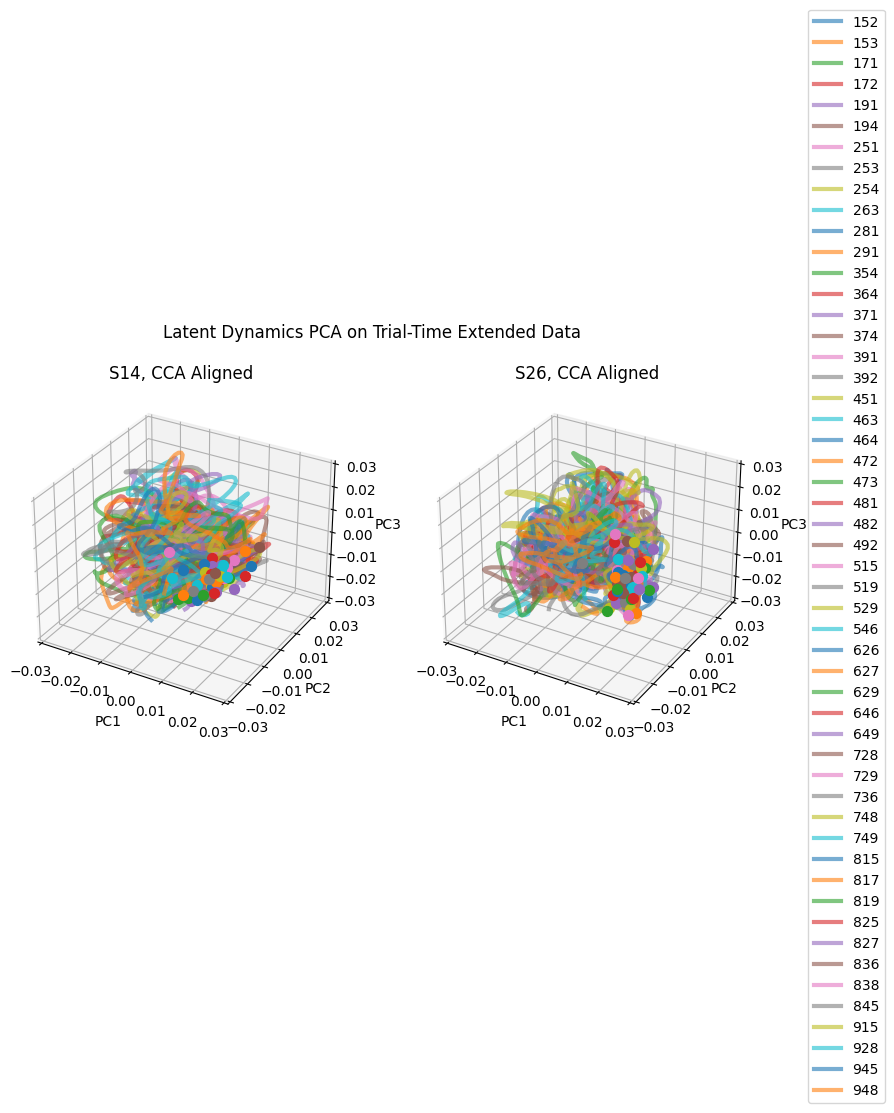

In [47]:
f = plt.figure(figsize=plt.figaspect(0.5))
sp = [121, 122]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_seq[i]
    curr_lab = pt_seq_labels[i]
    for j, seq in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=seq, linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_xlim([-0.03, 0.03])
    ax.set_ylim([-0.03, 0.03])
    ax.set_zlim([-0.03, 0.03])
    ax.set_title(f'{pt_list[i]}, CCA Aligned')

plt.legend(bbox_to_anchor=(1.4, 0.5), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

##### P1 Instances

In [48]:
M_p1_S14, M_p1_S26 = CCA_align(L_p1_S14.T, L_p1_S26.T)
L_new_p1_S14 = L_p1_S14 @ M_p1_S14
L_new_p1_S26 = L_p1_S26 @ M_p1_S26

In [49]:
L_new_p1_S14 = np.reshape(L_new_p1_S14, (lat_dyn_S14_p1_sep.shape[0], lat_dyn_S14_p1_sep.shape[1], lat_dyn_S14_p1_sep.shape[2]))
L_new_p1_S26 = np.reshape(L_new_p1_S26, (lat_dyn_S26_p1_sep.shape[0], lat_dyn_S26_p1_sep.shape[1], lat_dyn_S26_p1_sep.shape[2]))

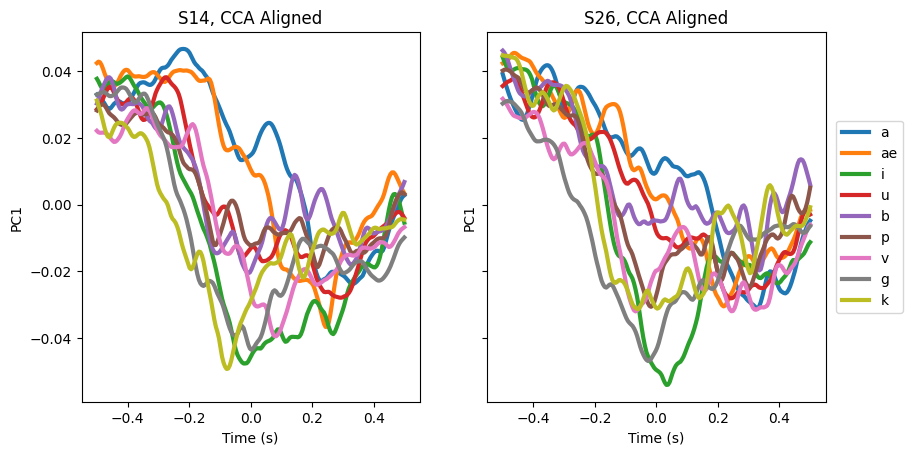

In [50]:
pt_L_new_p1 = [L_new_p1_S14, L_new_p1_S26]
pc_ind = 0

f, axs = plt.subplots(1, 2, figsize=plt.figaspect(0.5), sharey=True)
for i, ax in enumerate(axs.flat):
    L_new_curr = pt_L_new_p1[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):
        ax.plot(t, L_new_curr[j,:,pc_ind], label=phon_labels[j], linewidth=3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(f'PC{pc_ind+1}')
    ax.set_title(f'{pt_list[i]}, CCA Aligned')
plt.legend(bbox_to_anchor=(1.25, 0.5), loc="center right")
plt.show()

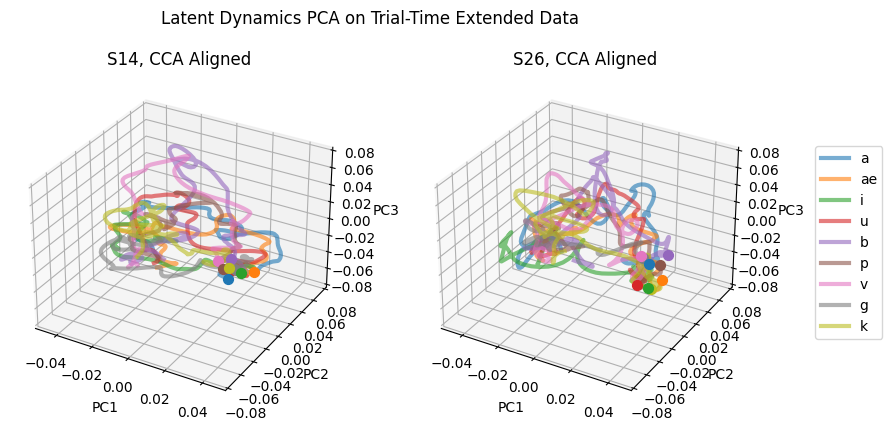

In [51]:
f = plt.figure(figsize=plt.figaspect(0.5))
sp = [121, 122]

for i, sp_type in enumerate(sp):
    ax = f.add_subplot(sp_type, projection='3d')
    L_new_curr = pt_L_new_p1[i]
    curr_lab = pt_p1_labels[i]
    for j, _ in enumerate(np.unique(curr_lab)):   
        ax.plot(L_new_curr[j, :,0], L_new_curr[j, :,1], L_new_curr[j, :,2], label=phon_labels[j], linewidth=3, alpha=0.6)
        ax.scatter(L_new_curr[j, 0,0], L_new_curr[j, 0,1], L_new_curr[j, 0,2], s=50)
        # ax.scatter(curr_lat_dyn[j][-1,0], curr_lat_dyn[j][-1,1], curr_lat_dyn[j][-1,2], s=50, marker='>') 
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_xlim([-0.05, 0.05])
    ax.set_ylim([-0.08, 0.08])
    ax.set_zlim([-0.08, 0.08])
    ax.set_title(f'{pt_list[i]}, CCA Aligned')

plt.legend(bbox_to_anchor=(1.4, 0.5), loc="center right")
plt.suptitle('Latent Dynamics PCA on Trial-Time Extended Data')
plt.show()

In [52]:
lat_dyn_S14_ext_algn = lat_dyn_S14_ext @ M_p1_S14
lat_dyn_S26_ext_algn = lat_dyn_S26_ext @ M_p1_S26

# lat_dyn_S14_ext_algn = lat_dyn_S14_ext @ M_seq_S14
# lat_dyn_S26_ext_algn = lat_dyn_S26_ext @ M_seq_S26

#### Linear Decoding w/ Aligned Data

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

# X = S14_hg_trace.reshape((S14_hg_trace.shape[0], S14_hg_trace.shape[1]*S14_hg_trace.shape[2]))
# X = lat_dyn_S14_ext.reshape((lat_dyn_S14_ext.shape[0], lat_dyn_S14_ext.shape[1]*lat_dyn_S14_ext.shape[2]))
# X = lat_dyn_S14_ext_algn.reshape((lat_dyn_S14_ext_algn.shape[0], lat_dyn_S14_ext_algn.shape[1]*lat_dyn_S14_ext_algn.shape[2]))
X = S26_hg_trace.reshape((S26_hg_trace.shape[0], S26_hg_trace.shape[1]*S26_hg_trace.shape[2]))
# X = lat_dyn_S26_ext.reshape((lat_dyn_S26_ext.shape[0], lat_dyn_S26_ext.shape[1]*lat_dyn_S26_ext.shape[2]))
# X = lat_dyn_S26_ext_algn.reshape((lat_dyn_S26_ext_algn.shape[0], lat_dyn_S26_ext_algn.shape[1]*lat_dyn_S26_ext_algn.shape[2]))
# y = S14_phon_labels[:, 0]
y = S26_phon_labels[:, 0]



y_true_all = []
y_pred_all = []
cv_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
for train_index, test_index in cv_split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # clf = LDA()
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

acc_solo = balanced_accuracy_score(y_true_all, y_pred_all)
cmat_solo = confusion_matrix(y_true_all, y_pred_all)
print(f'Balanced Accuracy: {acc_solo}\n')

Balanced Accuracy: 0.5494366137162385



In [112]:
from sklearn.svm import LinearSVC

X1 = lat_dyn_S14_ext.reshape((lat_dyn_S14_ext.shape[0], lat_dyn_S14_ext.shape[1]*lat_dyn_S14_ext.shape[2]))
X2 = lat_dyn_S26_ext.reshape((lat_dyn_S26_ext.shape[0], lat_dyn_S26_ext.shape[1]*lat_dyn_S26_ext.shape[2]))
X3 = lat_dyn_S23_ext.reshape((lat_dyn_S23_ext.shape[0], lat_dyn_S23_ext.shape[1]*lat_dyn_S23_ext.shape[2]))
X4 = lat_dyn_S33_ext.reshape((lat_dyn_S33_ext.shape[0], lat_dyn_S33_ext.shape[1]*lat_dyn_S33_ext.shape[2]))
X_pre = np.concatenate((X1, X2, X3))
X_tar = X4
X_pre.shape

y1 = S14_phon_labels[:, 0]
y2 = S26_phon_labels[:, 0]
y3 = S23_phon_labels[:, 0]
y4 = S33_phon_labels[:, 0]
y_pre = np.concatenate((y1, y2, y3))
y_tar = y4

y_true_all = []
y_pred_all = []
cv_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
for train_index, test_index in cv_split.split(X_tar, y_tar):
    X_tar_train, X_tar_test = X_tar[train_index], X_tar[test_index]
    y_tar_train, y_tar_test = y_tar[train_index], y_tar[test_index]

    X_train = np.concatenate((X1, X_tar_train))
    y_train = np.concatenate((y1, y_tar_train))
    X_test = X_tar_test
    y_test = y_tar_test

    # clf = LDA()
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

acc_lat = balanced_accuracy_score(y_true_all, y_pred_all)
cmat_lat = confusion_matrix(y_true_all, y_pred_all)
print(f'Balanced Accuracy: {acc_lat}\n')

# clf = LDA()
clf = SVC(kernel='linear')
clf.fit(X_pre, y_pre)
y_pred = clf.predict(X_tar)
acc_lat_sep = balanced_accuracy_score(y_tar, y_pred)
cmat_lat_sep = confusion_matrix(y_tar, y_pred)
print('Training on one patient, testing on the other')
print(f'Balanced Accuracy (separate): {acc_lat_sep}')

Balanced Accuracy: 0.4166666666666667

Training on one patient, testing on the other
Balanced Accuracy (separate): 0.2314814814814815


d:\Duke\Viventi_Cogan_Lab\RNN_transfer_learning\RNN_phoneme_decoding_micro\.venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

X1 = S14_hg_trace.reshape((S14_hg_trace.shape[0], S14_hg_trace.shape[1]*S14_hg_trace.shape[2]))
# X1 = lat_dyn_S14_ext.reshape((lat_dyn_S14_ext.shape[0], lat_dyn_S14_ext.shape[1]*lat_dyn_S14_ext.shape[2]))
# X1 = lat_dyn_S14_ext_algn.reshape((lat_dyn_S14_ext_algn.shape[0], lat_dyn_S14_ext_algn.shape[1]*lat_dyn_S14_ext_algn.shape[2]))
X2 = S26_hg_trace.reshape((S26_hg_trace.shape[0], S26_hg_trace.shape[1]*S26_hg_trace.shape[2]))
# X2 = lat_dyn_S26_ext.reshape((lat_dyn_S26_ext.shape[0], lat_dyn_S26_ext.shape[1]*lat_dyn_S26_ext.shape[2]))
# X2 = lat_dyn_S26_ext_algn.reshape((lat_dyn_S26_ext_algn.shape[0], lat_dyn_S26_ext_algn.shape[1]*lat_dyn_S26_ext_algn.shape[2]))
y1 = S14_phon_labels[:, 0]
y2 = S26_phon_labels[:, 0]
# y = np.concatenate((S14_phon_labels[:, 0], S26_phon_labels[:, 0]))


y_true_all = []
y_pred_all = []
cv_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
for train_index, test_index in cv_split.split(X2, y2):
    X2_train, X2_test = X2[train_index], X2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]

    X_train = np.concatenate((X1, X2_train))
    y_train = np.concatenate((y1, y2_train))
    X_test = X2_test
    y_test = y2_test

    # clf = LDA()
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

acc = balanced_accuracy_score(y_true_all, y_pred_all)
cmat = confusion_matrix(y_true_all, y_pred_all)
print('Training on both patients, testing on one')
print(f'Balanced Accuracy: {acc}\n')


# clf = LDA()
clf = SVC(kernel='linear')
clf.fit(X1, y1)
y_pred = clf.predict(X2)
acc_sep = balanced_accuracy_score(y2, y_pred)
cmat_sep = confusion_matrix(y2, y_pred)
print('Training on one patient, testing on the other')
print(f'Balanced Accuracy (separate): {acc_sep}')

Training on both patients, testing on one
Balanced Accuracy: 0.5172207351235485

Training on one patient, testing on the other
Balanced Accuracy (separate): 0.1111111111111111


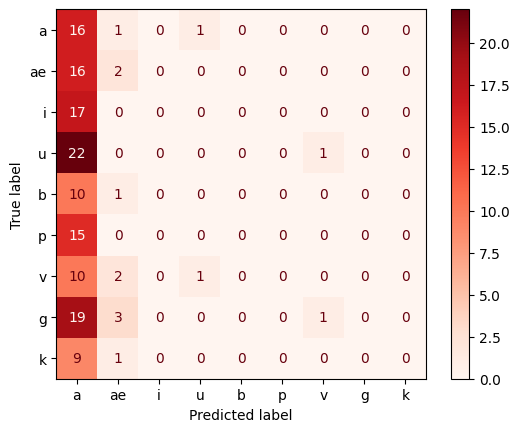

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cmat_sep, display_labels=phon_labels)
disp.plot(cmap='Reds')
plt.show()